In [1]:
import h5py
import scipy
import numpy as np
import torch

In [2]:
base_dir = "/home/mafzhang/code/Project/CHLA-Imputation-and-Prediction-for-Bay/log/prediction/PRE/"

In [3]:
label = np.load("/home/mafzhang/data/PRE/8d/trues.npy")
label_masks = np.load("/home/mafzhang/data/PRE/8d/true_masks.npy")

In [4]:
prediction_xg = np.load(base_dir+"XGBoost/with_imputation/prediction.npy", allow_pickle=True)
prediction_xg_wo = np.load(base_dir+"XGBoost/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_our = np.load(base_dir+"GraphTransformer/with_imputation/prediction.npy", allow_pickle=True)
prediction_our_wo = np.load(base_dir+"GraphTransformer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_mtgnn = np.load(base_dir+"MTGNN/with_imputation/prediction.npy", allow_pickle=True)
prediction_mtgnn_wo = np.load(base_dir+"MTGNN/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_tsmixer = np.load(base_dir+"TSMixer/with_imputation/prediction.npy", allow_pickle=True)
prediction_tsmixer_wo = np.load(base_dir+"TSMixer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_crossformer = np.load(base_dir+"CrossFormer/with_imputation/prediction.npy", allow_pickle=True)
prediction_crossformer_wo = np.load(base_dir+"CrossFormer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_iTransformer = np.load(base_dir+"iTransformer/with_imputation/prediction.npy", allow_pickle=True)
prediction_iTransformer_wo = np.load(base_dir+"iTransformer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_predrnn = np.load(base_dir+"PredRNN/with_imputation/prediction.npy", allow_pickle=True)
prediction_predrnn_wo = np.load(base_dir+"PredRNN/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_pde = np.load("/home/mafzhang/data/PRE/8d/cmmos.npy")

In [5]:
label_masks = label_masks.squeeze()
label = label.squeeze()
label = torch.from_numpy(label)
label_masks = torch.from_numpy(label_masks)

In [6]:
prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_our_wo = torch.from_numpy(prediction_our_wo).squeeze()
prediction_xg = torch.from_numpy(prediction_xg).squeeze().median(1).values
prediction_xg_wo = torch.from_numpy(prediction_xg_wo).squeeze()
prediction_tsmixer = torch.from_numpy(prediction_tsmixer).squeeze().median(1).values
prediction_tsmixer_wo = torch.from_numpy(prediction_tsmixer_wo).squeeze()
prediction_mtgnn = torch.from_numpy(prediction_mtgnn).squeeze().median(1).values
prediction_mtgnn_wo = torch.from_numpy(prediction_mtgnn_wo).squeeze()
prediction_crossformer = torch.from_numpy(prediction_crossformer).squeeze().median(1).values
prediction_crossformer_wo = torch.from_numpy(prediction_crossformer_wo).squeeze()
prediction_iTransformer = torch.from_numpy(prediction_iTransformer).squeeze().median(1).values
prediction_iTransformer_wo = torch.from_numpy(prediction_iTransformer_wo).squeeze()
prediction_predrnn = torch.from_numpy(prediction_predrnn).squeeze().median(1).values
prediction_predrnn_wo = torch.from_numpy(prediction_predrnn_wo).squeeze()
prediction_pde = torch.from_numpy(prediction_pde)

In [8]:
mse_our= (((prediction_our.mean(1)- label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_our))
mse_our_wo = (((prediction_our_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_our_wo))

mse_xg = (((prediction_xg - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_xg))
mse_xg_wo = (((prediction_xg_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_xg_wo))

mse_tsmixer = (((prediction_tsmixer- label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_tsmixer))
mse_tsmixer_wo = (((prediction_tsmixer_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_tsmixer_wo))

mse_crossformer = (((prediction_crossformer- label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_crossformer))
mse_crossformer_wo = (((prediction_crossformer_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)

mse_mtgnn = (((prediction_mtgnn - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_mtgnn))
mse_mtgnn_wo = (((prediction_mtgnn_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_mtgnn_wo))

print(prediction_iTransformer.shape)
mse_iTransformer = (((prediction_iTransformer - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_iTransformer))
mse_iTransformer_wo = (((prediction_iTransformer_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_iTransformer_wo))

mse_predrnn = (((prediction_predrnn - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_predrnn))
mse_predrnn_wo = (((prediction_predrnn_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_predrnn_wo))

mse_pde = (((prediction_pde- label[:322,0])*label_masks[:322,0])**2).sum(0)/(label_masks[:322,0].sum(0)+1e-5)
print(np.nanmean(mse_pde))

0.06993641
0.09210903
0.16544265
0.18463
0.08785449
0.13500492
0.0943762
0.09274674
0.17269786
torch.Size([329, 46, 4443])
0.076733105
0.17230226
0.09890262
0.08998027
0.36186748716981854


In [9]:
mse_our[mse_our==0]=np.nan
mse_our_wo[mse_our_wo==0]=np.nan
mse_xg_wo[mse_xg_wo==0]=np.nan
mse_xg[mse_xg==0]=np.nan
mse_crossformer_wo[mse_crossformer_wo==0]=np.nan
mse_crossformer[mse_crossformer==0]=np.nan
mse_mtgnn_wo[mse_mtgnn_wo==0]=np.nan
mse_mtgnn[mse_mtgnn==0]=np.nan
mse_tsmixer_wo[mse_tsmixer_wo==0]=np.nan
mse_tsmixer[mse_tsmixer==0]=np.nan
mse_iTransformer_wo[mse_iTransformer_wo==0]=np.nan
mse_iTransformer[mse_iTransformer==0]=np.nan
mse_predrnn_wo[mse_predrnn_wo==0]=np.nan
mse_predrnn[mse_predrnn==0]=np.nan

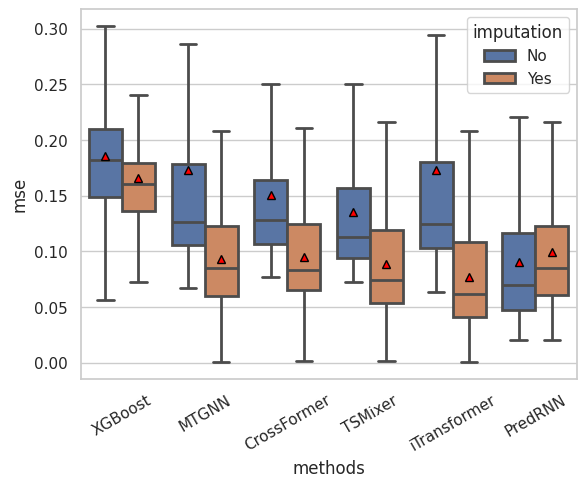

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
category = []
category.extend(['XGBoost' for i in range(4443)])
category.extend(['XGBoost' for i in range(4443)])
category.extend(['MTGNN' for i in range(4443)])
category.extend(['MTGNN' for i in range(4443)])
category.extend(['CrossFormer' for i in range(4443)])
category.extend(['CrossFormer' for i in range(4443)])
category.extend(['TSMixer' for i in range(4443)])
category.extend(['TSMixer' for i in range(4443)])
category.extend(['iTransformer' for i in range(4443)])
category.extend(['iTransformer' for i in range(4443)])
category.extend(['PredRNN' for i in range(4443)])
category.extend(['PredRNN' for i in range(4443)])
imputation = []
imputation.extend(['No' for i in range(4443)])
imputation.extend(['Yes' for i in range(4443)])
imputation.extend(['No' for i in range(4443)])
imputation.extend(['Yes' for i in range(4443)])
imputation.extend(['No' for i in range(4443)])
imputation.extend(['Yes' for i in range(4443)])
imputation.extend(['No' for i in range(4443)])
imputation.extend(['Yes' for i in range(4443)])
imputation.extend(['No' for i in range(4443)])
imputation.extend(['Yes' for i in range(4443)])
imputation.extend(['No' for i in range(4443)])
imputation.extend(['Yes' for i in range(4443)])

data = {'mse': np.concatenate([mse_xg_wo.numpy(), mse_xg.numpy(), mse_mtgnn_wo.numpy(), mse_mtgnn.numpy(), mse_crossformer_wo.numpy(), mse_crossformer.numpy(), mse_tsmixer_wo.numpy(), mse_tsmixer.numpy(), mse_iTransformer_wo.numpy(), mse_iTransformer.numpy(), mse_predrnn_wo.numpy(), mse_predrnn.numpy()],0),
        'methods':category,
        'imputation':imputation}
data = pd.DataFrame.from_dict(data)
sns.set(style="whitegrid")
plt.xticks(rotation=30)
g = sns.boxplot(x='methods', y='mse', hue='imputation', linewidth=2,showfliers=False,showmeans=True,data=data,meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})

['#FC8002', '#96ABDC', '#9EC5CC', '#BFDAB6', '#F1CFB0', '#4E5E7B', '#80AE6B', '#F8766D']


/tmp/ipykernel_3709115/2364111472.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(x='methods', y='mse', linewidth=2,showfliers=False,showmeans=True,data=data,palette=color, meanprops={


([], [])

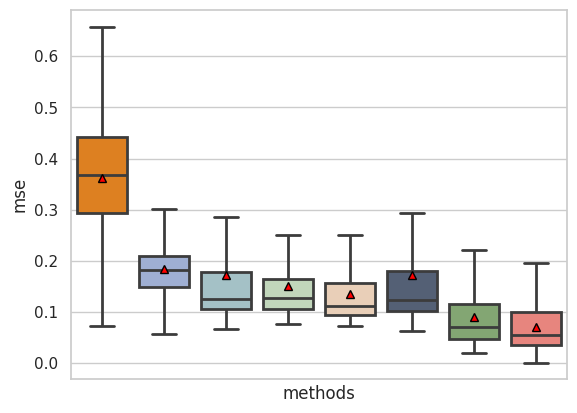

In [11]:
import pandas as pd
import numpy as np
category = []
category.extend(['CMMOS' for i in range(4443)])
category.extend(['XGBoost' for i in range(4443)])
# category.extend(['XGBoost' for i in range(4443)])
category.extend(['MTGNN' for i in range(4443)])
# category.extend(['MTGNN' for i in range(4443)])
category.extend(['CrossFormer' for i in range(4443)])
# category.extend(['CrossFormer' for i in range(4443)])
category.extend(['TSMixer' for i in range(4443)])
# category.extend(['TSMixer' for i in range(4443)])
category.extend(['iTransformer' for i in range(4443)])
# category.extend(['iTransformer' for i in range(4443)])
category.extend(['PredRNN' for i in range(4443)])
# category.extend(['PredRNN' for i in range(4443)])
category.extend(['Our' for i in range(4443)])
data = {'mse': np.concatenate([mse_pde.numpy(), mse_xg_wo.numpy(), mse_mtgnn_wo.numpy(), mse_crossformer_wo.numpy(), mse_tsmixer_wo.numpy(), mse_iTransformer_wo.numpy(), mse_predrnn_wo.numpy(),  mse_our.numpy()],0),
        'methods':category}
        # 'imputation':imputation}
data = pd.DataFrame.from_dict(data)
sns.set(style="whitegrid")
plt.xticks(rotation=30)
# color= sns.color_palette()[:7][::-1]
color = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC", "#FC8002"][::-1]
print(color)
g = sns.boxplot(x='methods', y='mse', linewidth=2,showfliers=False,showmeans=True,data=data,palette=color, meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})
plt.xticks([])

In [12]:
mae_our= ((np.abs(prediction_our.mean(1)- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_our))
mae_our_wo = ((np.abs(prediction_our_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_our_wo))

mae_xg = ((np.abs(prediction_xg - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_xg))
mae_xg_wo = ((np.abs(prediction_xg_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_xg_wo))

mae_tsmixer = ((np.abs(prediction_tsmixer- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_tsmixer))
mae_tsmixer_wo = ((np.abs(prediction_tsmixer_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_tsmixer_wo))

mae_crossformer = ((np.abs(prediction_crossformer- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_crossformer))
mae_crossformer_wo = ((np.abs(prediction_crossformer_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_crossformer_wo))

mae_mtgnn = ((np.abs(prediction_mtgnn - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_mtgnn))
mae_mtgnn_wo = ((np.abs(prediction_mtgnn_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_mtgnn_wo))

mae_iTransformer = ((np.abs(prediction_iTransformer - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_iTransformer))
mae_iTransformer_wo = ((np.abs(prediction_iTransformer_wo- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_iTransformer_wo))

mae_predrnn = ((np.abs(prediction_predrnn - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_predrnn))
mae_predrnn_wo = ((np.abs(prediction_predrnn_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_predrnn_wo))

mae_pde = ((np.abs(prediction_pde - label[:322,0])*label_masks[:322,0])).sum(0)/(label_masks[:322,0].sum(0)+1e-5)

0.1944275
0.22710621
0.33963645
0.35655594
0.23515518
0.29954606
0.24393806
0.31450367
0.24239285
0.34601954
0.20681943
0.34509417
0.24297844
0.22148255


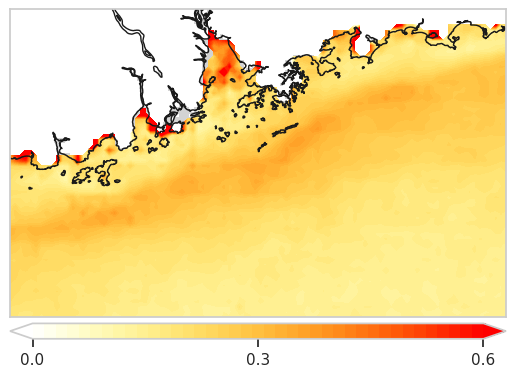

In [27]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
from copy import deepcopy
import h5py
from numpy import meshgrid
import numpy as np
from cmap import Colormap

cm = Colormap('vispy:fire').to_mpl()  # case insensitive
is_sea = np.load("/home/mafzhang/data/PRE/8d/is_sea.npy")
mae_xg_sp = deepcopy(mae_predrnn_wo.numpy())
tmp = np.zeros((60,96))
tmp[~is_sea.astype(bool)]= np.nan
tmp[is_sea.astype(bool)]= mae_xg_sp

raw_data = h5py.File("/home/mafzhang/data/PRE/8d/modis_chla_8d_4km_pre.mat", 'r')
lon = np.array(raw_data['longitude']).squeeze()
lati = np.array(raw_data['latitude']).squeeze()
[x,y] = meshgrid(lon, lati)


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(x, y, tmp, levels=np.linspace(0, 0.6, 40),cmap=cm,extend='both')

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
map.colorbar(boundaries=np.linspace(0, 0.6, 100), ticks=np.linspace(0, 0.6, 3),location='bottom')

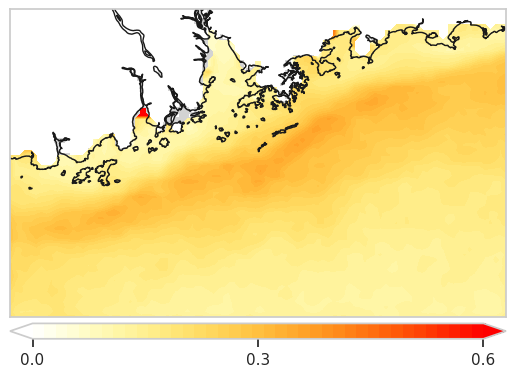

In [28]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
from copy import deepcopy
import h5py
from numpy import meshgrid
import numpy as np

cm = Colormap('vispy:fire').to_mpl()
is_sea = np.load("/home/mafzhang/data/PRE/8d/is_sea.npy")
mae_our_sp = deepcopy(mae_our.numpy())
tmp = np.zeros((60,96))
tmp[~is_sea.astype(bool)]= np.nan
tmp[is_sea.astype(bool)]= mae_our_sp

raw_data = h5py.File("/home/mafzhang/data/PRE/8d/modis_chla_8d_4km_pre.mat", 'r')
lon = np.array(raw_data['longitude']).squeeze()
lati = np.array(raw_data['latitude']).squeeze()
[x,y] = meshgrid(lon, lati)


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(x, y, tmp, levels=np.linspace(0, 0.6, 40),cmap=cm,extend='both')

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
map.colorbar(boundaries=np.linspace(0, 0.6, 100), ticks=np.linspace(0, 0.6, 3),location='bottom')

/tmp/ipykernel_3709115/2131986431.py:11: RuntimeWarning: invalid value encountered in divide
  improvement =  (mae_predrnn_wo.numpy() - mae_our.numpy())/mae_predrnn_wo.numpy()


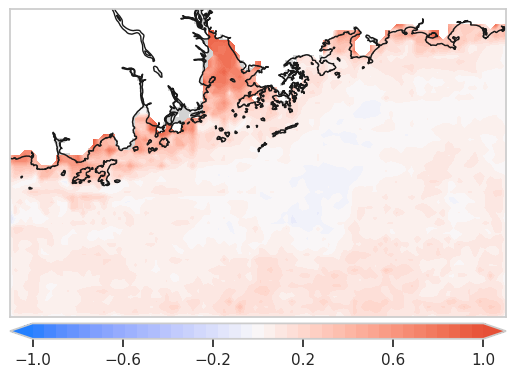

In [29]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
from copy import deepcopy
import h5py
from numpy import meshgrid
import numpy as np

cm = Colormap('colorcet:CET_D9').to_mpl()
is_sea = np.load("/home/mafzhang/data/PRE/8d/is_sea.npy")
improvement =  (mae_predrnn_wo.numpy() - mae_our.numpy())/mae_predrnn_wo.numpy()
tmp = np.zeros((60,96))
tmp[~is_sea.astype(bool)]= np.nan
tmp[is_sea.astype(bool)]= improvement

raw_data = h5py.File("/home/mafzhang/data/PRE/8d/modis_chla_8d_4km_pre.mat", 'r')
lon = np.array(raw_data['longitude']).squeeze()
lati = np.array(raw_data['latitude']).squeeze()
[x,y] = meshgrid(lon, lati)


lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='f')
# map.fillcontinents(color='white')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
# map.bluemarble()
map.drawcoastlines()
map.contourf(x, y, tmp, levels=np.linspace(-1, 1, 40),cmap=cm,extend='both')

# map.contourf(x, y, tmp2, levels=np.linspace(-1.5, 1.5, 40),cmap="Greys")
map.colorbar(boundaries=np.linspace(-1, 1, 100), ticks=np.linspace(-1, 1, 6),location="bottom")

In [30]:
label.shape

torch.Size([329, 46, 4443])

torch.Size([329, 10, 46, 4443])


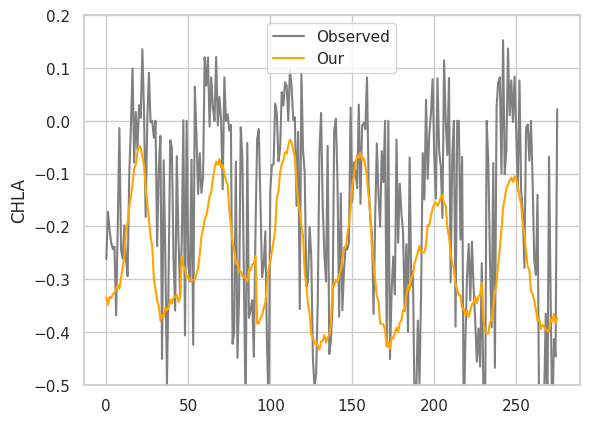

In [43]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt

area1 = np.load("/home/mafzhang/data/PRE/8d/mask1.npy")
area2 = np.load("/home/mafzhang/data/PRE/8d/mask2.npy")
area3 = np.load("/home/mafzhang/data/PRE/8d/mask3.npy")
is_sea = np.load("/home/mafzhang/data/PRE/8d/is_sea.npy")
index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
plt.plot(np.arange(276), tmp.mean(1), label="Observed",color="Grey")

print(prediction_our.shape)
predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,4443))
predict = predict[:,:].mean(1)
predict = predict.mean(-1)
# mean = predict.mean(1)
# std = predict.std(1)

plt.plot(np.arange(276), predict, label="Our", color="Orange")
# plt.fill_between(np.arange(276), mean-3*std, mean+3*std, alpha=0.3)

plt.legend()
plt.ylabel("CHLA")
plt.ylim(-0.5,0.2)
plt.show()

In [14]:
mae_our[mae_our==0]=np.nan
mae_our_wo[mae_our_wo==0]=np.nan
mae_xg_wo[mae_xg_wo==0]=np.nan
mae_xg[mae_xg==0]=np.nan
mae_crossformer_wo[mae_crossformer_wo==0]=np.nan
mae_crossformer[mae_crossformer==0]=np.nan
mae_mtgnn_wo[mae_mtgnn_wo==0]=np.nan
mae_mtgnn[mae_mtgnn==0]=np.nan
mae_tsmixer_wo[mae_tsmixer_wo==0]=np.nan
mae_tsmixer[mae_tsmixer==0]=np.nan
mae_iTransformer_wo[mae_iTransformer_wo==0]=np.nan
mae_iTransformer[mae_iTransformer==0]=np.nan
mae_predrnn_wo[mae_predrnn_wo==0]=np.nan
mae_predrnn[mae_predrnn==0]=np.nan

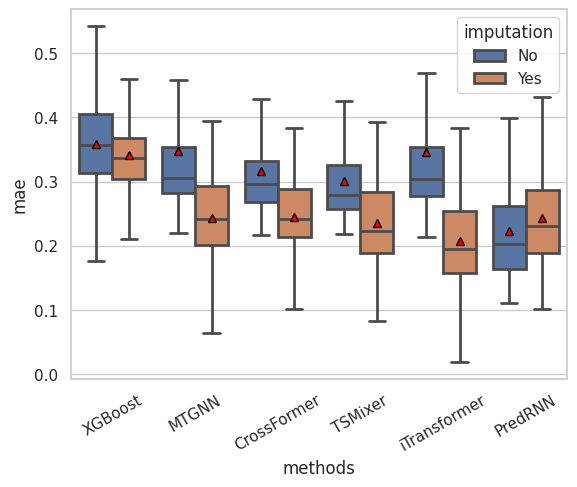

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
category = []
category.extend(['XGBoost' for i in range(4443)])
category.extend(['XGBoost' for i in range(4443)])
category.extend(['MTGNN' for i in range(4443)])
category.extend(['MTGNN' for i in range(4443)])
category.extend(['CrossFormer' for i in range(4443)])
category.extend(['CrossFormer' for i in range(4443)])
category.extend(['TSMixer' for i in range(4443)])
category.extend(['TSMixer' for i in range(4443)])
category.extend(['iTransformer' for i in range(4443)])
category.extend(['iTransformer' for i in range(4443)])
category.extend(['PredRNN' for i in range(4443)])
category.extend(['PredRNN' for i in range(4443)])

imputation = []
imputation.extend(['No' for i in range(4443)])
imputation.extend(['Yes' for i in range(4443)])
imputation.extend(['No' for i in range(4443)])
imputation.extend(['Yes' for i in range(4443)])
imputation.extend(['No' for i in range(4443)])
imputation.extend(['Yes' for i in range(4443)])
imputation.extend(['No' for i in range(4443)])
imputation.extend(['Yes' for i in range(4443)])
imputation.extend(['No' for i in range(4443)])
imputation.extend(['Yes' for i in range(4443)])
imputation.extend(['No' for i in range(4443)])
imputation.extend(['Yes' for i in range(4443)])

data = {'mae': np.concatenate([mae_xg_wo.numpy(), mae_xg.numpy(), mae_mtgnn_wo.numpy(), mae_mtgnn.numpy(), mae_crossformer_wo.numpy(), mae_crossformer.numpy(), mae_tsmixer_wo.numpy(), mae_tsmixer.numpy(), mae_iTransformer_wo.numpy(), mae_iTransformer.numpy(), mae_predrnn_wo.numpy(), mae_predrnn.numpy()],0),
        'methods':category,
        'imputation':imputation}
data = pd.DataFrame.from_dict(data)



plt.xticks(rotation=30)
g = sns.boxplot(x='methods', y='mae', hue='imputation', linewidth=2,showfliers=False,showmeans=True,data=data,meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})

In [18]:
import pandas as pd
import numpy as np
category = []
category.extend(['CMOMS' for i in range(4443)])
category.extend(['XGBoost' for i in range(4443)])
category.extend(['MTGNN' for i in range(4443)])
category.extend(['CrossFormer' for i in range(4443)])
category.extend(['TSMixer' for i in range(4443)])
category.extend(['iTransformer' for i in range(4443)])
category.extend(['PredRNN' for i in range(4443)])
category.extend(['Our' for i in range(4443)])
data = {'mae': np.concatenate([ mae_pde.numpy(), mae_xg_wo.numpy(), mae_mtgnn_wo.numpy(), mae_crossformer_wo.numpy(), mae_tsmixer_wo.numpy(), mae_iTransformer_wo.numpy(), mae_predrnn_wo.numpy(),  mae_our.numpy()],0),
        'methods':category}
data = pd.DataFrame.from_dict(data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


([], [])

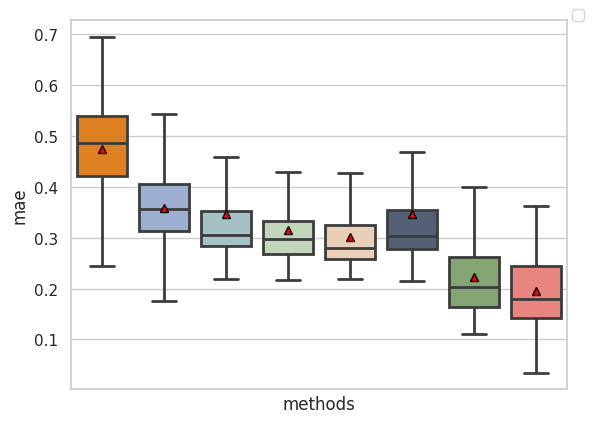

In [19]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.xticks(rotation=30)
# color= sns.color_palette()[:7][::-1]
color = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC", "#FC8002"][::-1]

g = sns.boxplot(data=data, x='methods', y='mae', hue="methods", linewidth=2, showfliers=False,showmeans=True,palette=color, meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})
# g.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
plt.xticks([])

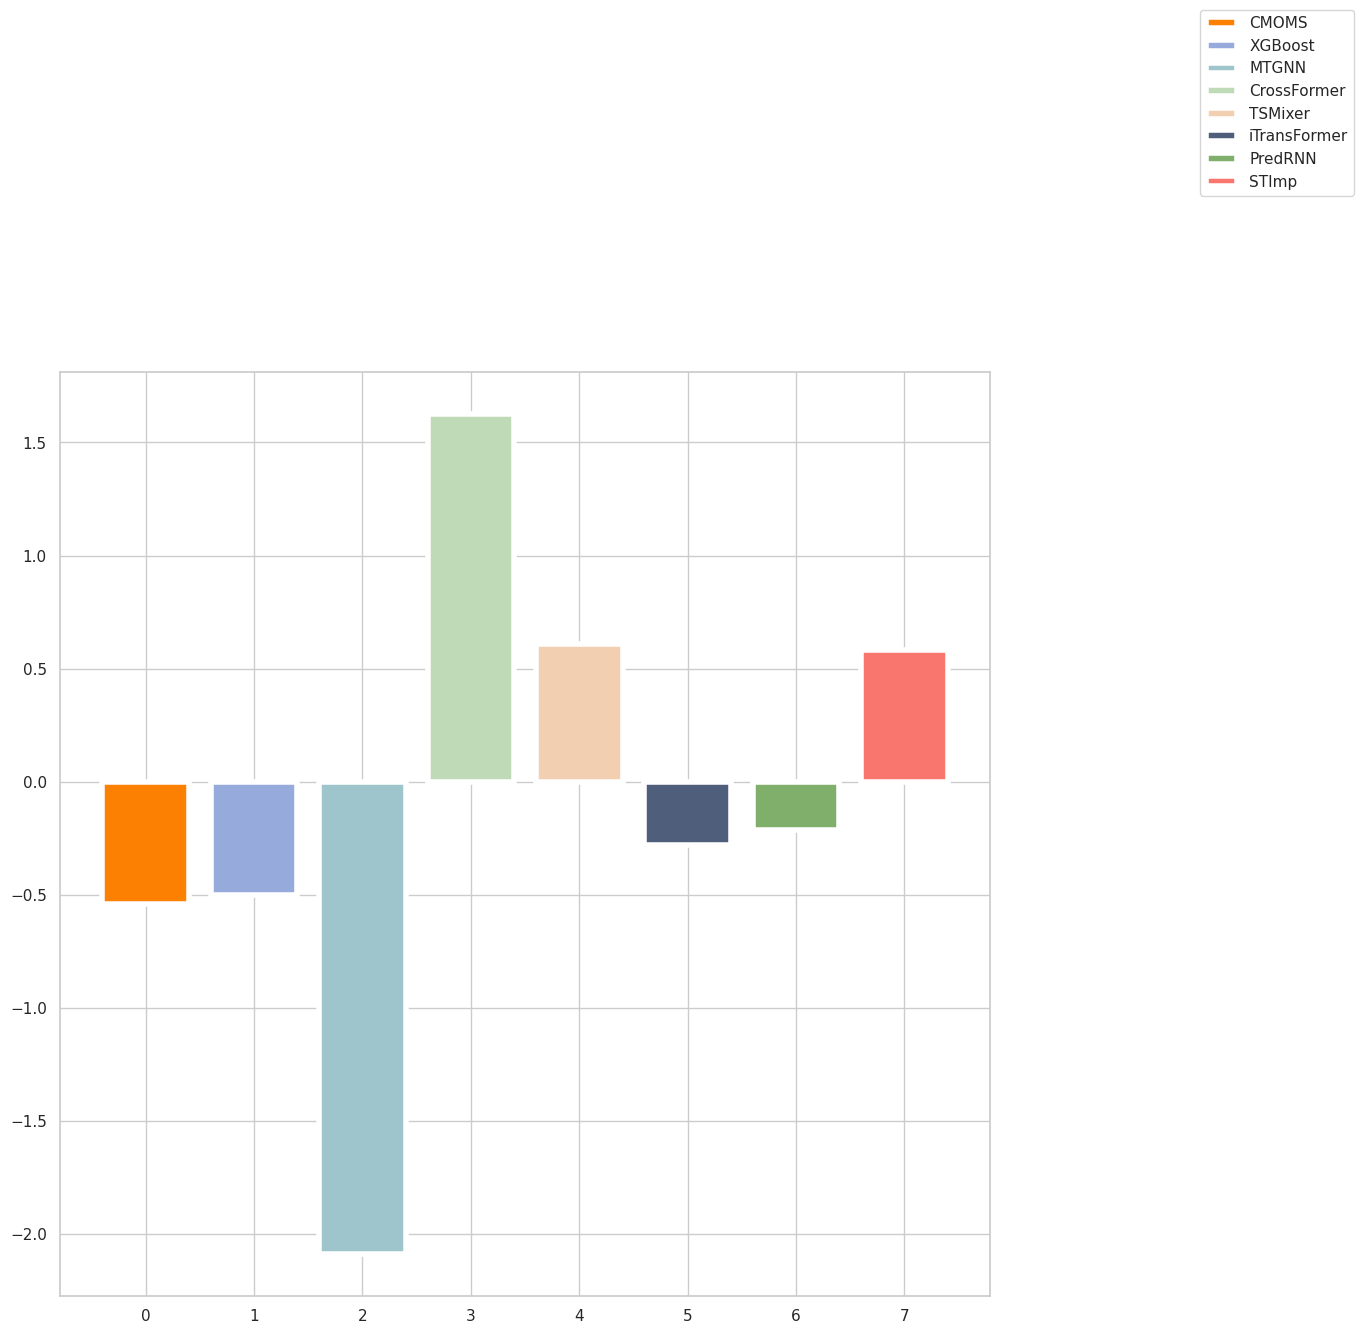

In [32]:
color = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC", "#FC8002"][::-1]
x = ['CMOMS', "XGBoost", "MTGNN", "CrossFormer", "TSMixer", "iTransFormer", "PredRNN", "STImp"]
y = np.random.randn(len(x))
fig, ax = plt.subplots(figsize=(12, 12))
for i in range(len(x)):
        values = y[i]
        ax.bar(i, values, linewidth=4, linestyle="solid", label=x[i], color=color[i%len(color)])
ax.legend(loc="upper right", bbox_to_anchor=(1.4,1.4))

In [20]:
prediction_xg = np.load(base_dir+"XGBoost/with_imputation/prediction.npy", allow_pickle=True)
prediction_xg_wo = np.load(base_dir+"XGBoost/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_our = np.load(base_dir+"GraphTransformer/with_imputation/prediction.npy", allow_pickle=True)
prediction_our_wo = np.load(base_dir+"GraphTransformer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_mtgnn = np.load(base_dir+"MTGNN/with_imputation/prediction.npy", allow_pickle=True)
prediction_mtgnn_wo = np.load(base_dir+"MTGNN/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_tsmixer = np.load(base_dir+"TSMixer/with_imputation/prediction.npy", allow_pickle=True)
prediction_tsmixer_wo = np.load(base_dir+"TSMixer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_crossformer = np.load(base_dir+"CrossFormer/with_imputation/prediction.npy", allow_pickle=True)
prediction_crossformer_wo = np.load(base_dir+"CrossFormer/without_imputation/prediction_0.npy", allow_pickle=True)

In [21]:
prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_our_wo = torch.from_numpy(prediction_our_wo).squeeze()
prediction_xg = torch.from_numpy(prediction_xg).squeeze()
prediction_xg_wo = torch.from_numpy(prediction_xg_wo).squeeze()
prediction_tsmixer = torch.from_numpy(prediction_tsmixer).squeeze()
prediction_tsmixer_wo = torch.from_numpy(prediction_tsmixer_wo).squeeze()
prediction_mtgnn = torch.from_numpy(prediction_mtgnn).squeeze()
prediction_mtgnn_wo = torch.from_numpy(prediction_mtgnn_wo).squeeze()
prediction_crossformer = torch.from_numpy(prediction_crossformer).squeeze()
prediction_crossformer_wo = torch.from_numpy(prediction_crossformer_wo).squeeze()

In [ ]:
index = [46*i for i in range(306//46)]
prediction_our[index].shape

In [ ]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n=500

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,4443))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(np.arange(276), mean, label="Our")
plt.fill_between(np.arange(276), mean-std, mean+std, alpha=0.3)

plt.legend()
plt.ylabel("CHLA")
plt.ylim(-0.5,1.5)
plt.show()

In [ ]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n= 500

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

print(prediction_iTransformer_wo[0,0,:])
predict = deepcopy(prediction_our_wo[index].transpose(1,2).reshape(276,1,4443))
predict = predict[:,:,n]
# mean = predict.mean(1)
# std = predict.std(1)

plt.plot(np.arange(276), predict, label="Our")
# plt.fill_between(np.arange(276), mean-3*std, mean+3*std, alpha=0.3)

plt.legend()
plt.ylabel("CHLA")
plt.ylim(-0.5,1.5)
plt.show()

In [ ]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n= 500

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_xg[index].transpose(1,2).reshape(276,10,2907))
print(predict.shape)
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(np.arange(276), mean, label="XGBoost")
plt.fill_between(np.arange(276), mean-std, mean+std, alpha=0.3)

plt.legend()
plt.ylabel("CHLA")
plt.ylim(-0.5,1.5)
plt.show()

In [ ]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n= 500

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_tsmixer[index].transpose(1,2).reshape(276,10,2907))
print(predict.shape)
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(np.arange(276), mean, label="tsmixer")
plt.fill_between(np.arange(276), mean-std, mean+std, alpha=0.3)

plt.legend()
plt.ylabel("CHLA")
plt.ylim(-0.5,1.5)
plt.show()